#  TELCOVISION ANALYTICS   
## Customer Churn Prediction Project


## Project Overview

At **TelcoVision Analytics**, our mission is to help telecom companies use data-driven strategies to keep their customers happy and reduce the chances of them leaving

In today's competitive telecom market, **customer churn** (when people cancel their subscriptions or switch to other providers) can seriously hurt a company's revenue and growth. Bringing in new customers can cost **5 to 7 times more** than simply keeping existing ones satisfied

Right now, many companies deal with churn **reactively**, only after customers have already left. **TelcoVision Analytics** wants to change that by using **machine learning** to predict churn before it happens, allowing businesses to step in early with **personalized offers, better support and improved customer experiences**



##  Business Problem

Telecom providers often lack the ability to accurately identify customers at risk of leaving and this leads to:

- Inefficient marketing spending on blanket retention campaigns  
- Missed opportunities to retain valuable customers  
- Declining revenue and customer lifetime value

**Key Challenge:**  
How can we leverage customer demographic, billing and service usage data to accurately predict churn and proactively reduce customer attrition?

---

## Stakeholders

| Stakeholder         | Role / Interest                                                             |
|----------------------|------------------------------------------------------------------------------|
| Marketing Teams      | Use churn predictions to target high risk customers with personalized offers |
| Customer Service     | Engage with at risk customers to resolve issues early                        |
| Senior Management    | Make strategic business decisions to reduce churn and increase revenue       |
| Data Science Team    | Build and maintain churn prediction models                                   |
| Customers             | Benefit from improved service, offers and satisfaction                      |



## Business Objectives

- How can we improve customer retention by identifying and intervening on high risk customers?  
- How can we build a predictive model to classify customers as churn or non churn?  
- How can we uncover the most important factors influencing churn behavior to guide business strategy?



## Analysis Objectives

- Build and evaluate a machine learning classification model to predict customer churn  
- Start with **Logistic Regression as a baseline model** then experiment with other models (Decision Trees, Random Forest, Gradient Boosting, XGBoost) to find the best performing one  
- Identify which customer attributes like tenure, monthly charges and contract type are most predictive of churn  
- Assess how well our models distinguish between customers likely to churn and those likely to stay

---

## Data Understanding

We will use the **Telco Customer Churn Dataset** from Kaggle to build our prediction model
**Dataset Overview**
- Number of records: 7043 customers  
- Number of columns: 21 features  

**Dataset Columns**

| Column Name         | Description                                                 | Data Type                |
|----------------------|-------------------------------------------------------------|------------------------------|
| customerID            | Unique identifier for each customer                         | Categorical (ID)              |
| gender                 | Gender of the customer                                      | Categorical                    |
| SeniorCitizen          | Indicates if the customer is a senior citizen (1/0)         | Numeric (Binary)               |
| Partner                 | Whether the customer has a partner                          | Categorical                    |
| Dependents              | Whether the customer has dependents                         | Categorical                    |
| tenure                   | Number of months the customer has stayed                    | Numeric (Discrete)              |
| PhoneService             | Whether the customer has phone service                       | Categorical                    |
| MultipleLines             | Whether the customer has multiple phone lines                | Categorical                    |
| InternetService             | Type of internet service (DSL, Fiber optic, None)            | Categorical                    |
| OnlineSecurity               | Whether the customer has online security service               | Categorical                    |
| OnlineBackup                  | Whether the customer has online backup service                  | Categorical                    |
| DeviceProtection               | Whether the customer has device protection service               | Categorical                    |
| TechSupport                      | Whether the customer has tech support service                       | Categorical                    |
| StreamingTV                          | Whether the customer has streaming TV service                          | Categorical                    |
| StreamingMovies                           | Whether the customer has streaming movies service                           | Categorical                    |
| Contract                                     | Type of contract (Month-to-month, One year, Two year)                           | Categorical                    |
| PaperlessBilling                                     | Whether the customer uses paperless billing                                     | Categorical                    |
| PaymentMethod                                          | Customer’s payment method                                                      | Categorical                    |
| MonthlyCharges                                             | Amount charged monthly                                                           | Numeric (Continuous)             |
| TotalCharges                                                  | Total amount billed                                                              | Numeric (Continuous)             |
| Churn                                                               | Target variable: Whether the customer left                                       | Categorical (Target)              |



##  Data Source

**Dataset Name:** Telco Customer Churn  
**Source:** Kaggle – *blastchar/telco-customer-churn*  
[Link to dataset](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)



## Prediction Target

We aim to predict the `Churn` variable which indicates whether a customer has stopped using the service (`Yes`) or is still active (`No`)  
This is a **binary classification problem**




# Import modules & packages

In [1]:
# pip install imbalanced-learn


In [2]:
# !pip install --upgrade scikit-learn imbalanced-learn


In [3]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay




# Load Dataset

In [4]:
df = pd.read_csv(r"C:\Users\Harriet\Downloads\FUTURE ML_01\Data\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Column Value Count

In [5]:
# Loop through each column and print value counts
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts(dropna=False).head(10))  # show top 10 most frequent values


Column: customerID
customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
5855-EIBDE    1
8166-ZZTFS    1
0129-KPTWJ    1
9128-CPXKI    1
9509-MPYOD    1
Name: count, dtype: int64

Column: gender
gender
Male      3555
Female    3488
Name: count, dtype: int64

Column: SeniorCitizen
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

Column: Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Column: Dependents
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

Column: tenure
tenure
1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
70    119
Name: count, dtype: int64

Column: PhoneService
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Column: MultipleLines
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

Column: InternetService
InternetService
Fiber optic    3096
DSL            2421
No          

# DATA OVERVIEW

In [6]:
from IPython.display import display, Markdown

display(Markdown("## **DATA OVERVIEW**"))
display(Markdown("**Preview of the first five rows:**"))
display(df.head())

display(Markdown(f"**Dataset shape:** {df.shape}"))
display(Markdown(f"**Dataset columns:** {list(df.columns)}"))

display(Markdown("## **DATA TYPES**"))
display(Markdown("**Data types:**"))
display(df.dtypes)

display(Markdown("## **META DATA**"))
display(Markdown("**Meta data:**"))
display(df.info()) 

display(Markdown("## **STATISTICAL SUMMARY**"))
display(Markdown("**Statistical summary:**"))
display(df.describe().round(2))

display(Markdown("## **MISSING VALUES**"))
display(Markdown("**Missing Values:**"))
display(df.isna().sum())

display(Markdown("## **DUPLICATES**"))
display(Markdown("**Duplicates:**"))
display(df.duplicated().value_counts())

## **DATA OVERVIEW**

**Preview of the first five rows:**

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Dataset shape:** (7043, 21)

**Dataset columns:** ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

## **DATA TYPES**

**Data types:**

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## **META DATA**

**Meta data:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

## **STATISTICAL SUMMARY**

**Statistical summary:**

,SeniorCitizen,tenure,MonthlyCharges
count,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76
std,0.37,24.56,30.09
min,0.00,0.00,18.25
25%,0.00,9.00,35.50
50%,0.00,29.00,70.35
75%,0.00,55.00,89.85
max,1.00,72.00,118.75


## **MISSING VALUES**

**Missing Values:**

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## **DUPLICATES**

**Duplicates:**

False    7043
Name: count, dtype: int64

# DATA PREPARATION

# Data Quality Check

- There are no missing values or duplicate rows in the dataset 
- Most columns have the correct data types except the **`TotalCharges`** column that is  currently stored as an **object (string)** but it should be a **float (numeric)** 
- We will need to convert **`TotalCharges`** from object to float before proceeding with analysis or modeling


In [7]:
df["TotalCharges"].value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [8]:
# Replace empty strings with NaN
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

# Convert to float
df['TotalCharges'] = df['TotalCharges'].astype(float)


In [9]:
# Let's see the datatype  of the total charges column and also try and see the nans
print(df['TotalCharges'].dtype)       
print(df['TotalCharges'].isna().sum())


float64
11


## Handling Missing Values in `TotalCharges`

- Fill any `NaN` values with `0` to ensure the column has only numeric values
- Recheck the column to confirm that no missing values remain


In [10]:
# Fill NaNs with 0
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# Recheck for missing values
df['TotalCharges'].isna().sum()


0

In [11]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

- Now each column has the appropriate datatype

In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


## Statistical Summary Interpretation

- The dataset contains 7043 customers
- About 16% are senior citizens indicating the majority are younger customers.
- The average tenure is approximately 32 months, with values ranging from 0 to 72 months showing a mix of new and long term customers
- Monthly charges average around 64.76 ranging from 18.25 to 118.75 indicating a broad spread of service plans
- Total charges average 2279.73 but vary widely from $0 to 8684.80 reflecting differences in both customer tenure and plan costs


# Placeholder Value Check & Outlier Detection

In [13]:
# Function to check placeholder values
def check_placeholders(df):
    display(Markdown("## **Placeholder Values Check**"))
    placeholders_list = ['placeholder', 'na', 'n/a', '?', 'none', 'null', 'missing']
    
    for column in df.columns:
        values = df[column].astype(str).str.strip().str.lower()
        placeholders_found = values.isin(placeholders_list)
        count = placeholders_found.sum()
        if count > 0:
            print(f"Column: '{column}'")
            print(f"Number of placeholder values: {count}")
            print(f"Example placeholders: {values[placeholders_found].unique()}\n")
        else:
            print(f"Column: '{column}' - No placeholders found\n")

# Function to check for outliers using IQR (excluding binary columns)
def check_outliers(df):
    display(Markdown("## **Outlier Detection (IQR Method)**"))
    numeric_cols = df.select_dtypes(include=['number']).columns
    
    for col in numeric_cols:
        # Skip binary columns (with only 2 unique values)
        if df[col].nunique() <= 2:
            print(f"**{col}** — Skipped (binary column)")
            continue
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        print(f"**{col}** — Outliers: {len(outliers)}")

# Run the checks on your dataset
check_placeholders(df)
check_outliers(df)


## **Placeholder Values Check**

Column: 'customerID' - No placeholders found

Column: 'gender' - No placeholders found

Column: 'SeniorCitizen' - No placeholders found

Column: 'Partner' - No placeholders found

Column: 'Dependents' - No placeholders found

Column: 'tenure' - No placeholders found

Column: 'PhoneService' - No placeholders found

Column: 'MultipleLines' - No placeholders found

Column: 'InternetService' - No placeholders found

Column: 'OnlineSecurity' - No placeholders found

Column: 'OnlineBackup' - No placeholders found

Column: 'DeviceProtection' - No placeholders found

Column: 'TechSupport' - No placeholders found

Column: 'StreamingTV' - No placeholders found

Column: 'StreamingMovies' - No placeholders found

Column: 'Contract' - No placeholders found

Column: 'PaperlessBilling' - No placeholders found

Column: 'PaymentMethod' - No placeholders found

Column: 'MonthlyCharges' - No placeholders found

Column: 'TotalCharges' - No placeholders found

Column: 'Churn' - No placeholders found



## **Outlier Detection (IQR Method)**

**SeniorCitizen** — Skipped (binary column)
**tenure** — Outliers: 0
**MonthlyCharges** — Outliers: 0
**TotalCharges** — Outliers: 0


After performing data preparation checks on the dataset:

- **No placeholder values** (e.g., `"na"`, `"n/a"`, `"?"`, `"missing"`) were found in any column
- **No outliers** were detected in the numerical columns (after excluding binary columns from the analysis)

This confirms that the dataset is **clean, consistent and ready** for further exploratory data analysis and modeling


# Outlier Detection Visual

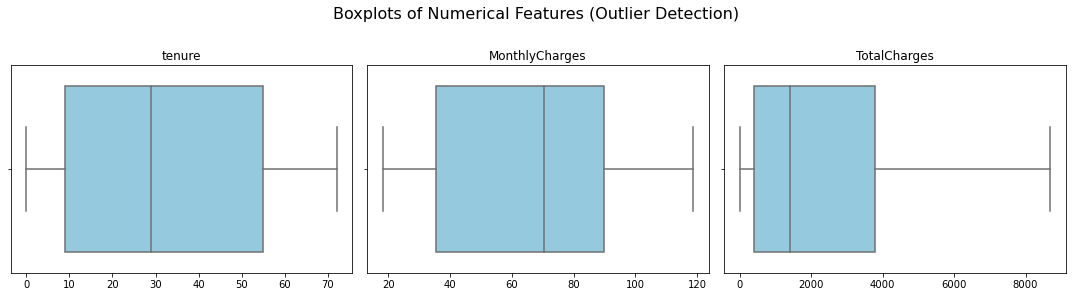

In [ ]:
# Plot boxplots for all numeric columns (excluding binary)
def plot_outliers(df):
    numeric_cols = df.select_dtypes(include=['number']).columns
    non_binary_cols = [col for col in numeric_cols if df[col].nunique() > 2]

    # Set figure size based on number of columns
    n_cols = 3
    n_rows = -(-len(non_binary_cols) // n_cols)  # ceiling division

    plt.figure(figsize=(5 * n_cols, 4 * n_rows))
    for i, col in enumerate(non_binary_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.boxplot(x=df[col], color='skyblue')
        plt.title(col)
        plt.xlabel("")

    plt.suptitle("Boxplots of Numerical Features (Outlier Detection)", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

# Call the plot function
plot_outliers(df)


- The boxes are compact indicating that the numerical features are well distributed
- Whiskers span most of the data range  suggesting balanced spread 
- No extreme values were found across the numeric columns  

The boxplots confirm the earlier IQR analysis:  
The dataset is **clean, consistent and free from extreme outliers** for all numeric features analyzed
